In [6]:
from pygmo import *
import pygmo as pg
import numpy as np
import time
import matplotlib.pyplot as plt

In [7]:
population_size = 50
fitness_results = []
griewank_data = pd.read_csv("Data/griewank_data.csv")
griewank = griewank_data["val"].tolist()


In [8]:
class shifted_griewank:
    def __init__(self, dims):
        self.dims = dims
   
    def fitness(self, x):
        bias = -180.0
        z = np.array(x) - np.array(griewank[:self.dims])
        F1 = np.sum(np.square(z) / 4000.0)
        F2 = np.prod(np.cos(z/np.sqrt((np.arange(self.dims) + 1))))
        global fitness_results
        val = F1 - F2 + 1 + bias
        fitness_results.append(val)
        return [val, ]
   
    def get_bounds(self):
        return ([-600]*self.dims,[600]*self.dims)

In [9]:
def execute_algorithm(dims):
    global fitness_results
    fitness_results = []
    current_algorithm = None
    current_problem = None
    current_population = None
    if(dims == 50):
        current_algorithm = algorithm(cmaes(gen=300, cc=- 1, cs=- 1, c1=- 1, cmu=- 1, sigma0=-1, ftol=1e-09, xtol=1e-09, memory=False, force_bounds=True))
        current_problem = pg.problem(shifted_griewank(50))
        current_population = population(current_problem, 50)
    elif(dims == 500):
        current_algorithm = algorithm(pso(gen=6000, omega= .7, eta1=4, eta2=.5, max_vel = .1, variant = 6, neighb_type = 2, 
              neighb_param = 5, memory=False))
        current_problem = pg.problem(shifted_griewank(500))
        current_population = population(current_problem, 25)
    else : 
        return "Provide correct dimensions"
        
    start_time = time.time()
    current_population_result = current_algorithm.evolve(current_population)
    ended_time = time.time()
    completed_time = ended_time - start_time
    print(current_population_result)
    print("\nComputational time:", round(completed_time, 2), "seconds\n")


Problem name: <class '__main__.shifted_griewank'>
	C++ class name: class pybind11::object

	Global dimension:			50
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-600, -600, -600, -600, -600, ... ]
	Upper bounds: [600, 600, 600, 600, 600, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 15050

	Thread safety: none

Population size: 50

List of individuals: 
#0:
	ID:			2028605510655447748
	Decision vector:	[540.145, -322.631, 128.206, -16.8324, 469.554, ... ]
	Fitness vector:		[-180]
#1:
	ID:			13941941748909257855
	Decision vector:	[540.148, -322.628, 128.213, -16.8227, 469.553, ... ]
	Fitness vector:		[-180]
#2:
	ID:			8770699582647846978
	Decision vector:	[540.152, -322.628, 128.202, -16.8142, 469.542, ... ]
	Fitness vector:	

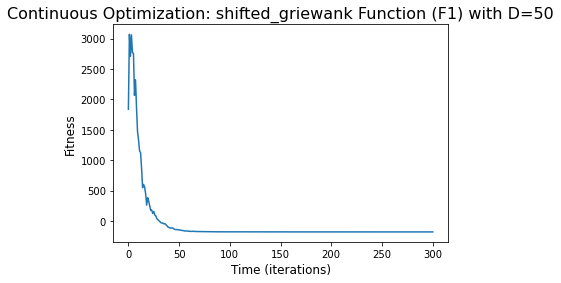

In [10]:
execute_algorithm(50)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: shifted_griewank Function (F1) with D=50", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()


Problem name: <class '__main__.shifted_griewank'>
	C++ class name: class pybind11::object

	Global dimension:			500
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-600, -600, -600, -600, -600, ... ]
	Upper bounds: [600, 600, 600, 600, 600, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 150025

	Thread safety: none

Population size: 25

List of individuals: 
#0:
	ID:			4672061403452427071
	Decision vector:	[540.245, -323.518, 128.843, -16.8796, 469.673, ... ]
	Fitness vector:		[-178.351]
#1:
	ID:			13618218238782639207
	Decision vector:	[540.213, -323.404, 128.732, -16.8033, 469.484, ... ]
	Fitness vector:		[-178.35]
#2:
	ID:			3861726709906149885
	Decision vector:	[540.21, -323.672, 128.687, -16.7966, 469.624, ... ]
	Fitness 

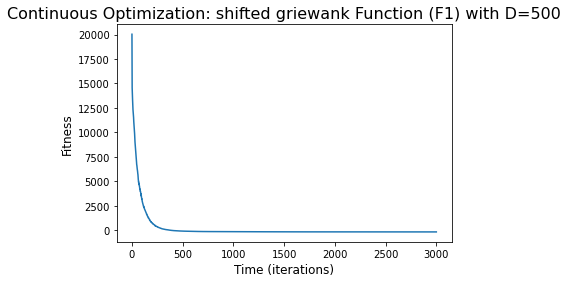

In [12]:
execute_algorithm(500)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: shifted griewank Function (F1) with D=500", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()